In [1]:
import pandas as pd
import numpy as np
folder = 'd:/git/project1/generated'

In [2]:
#data = pd.read_csv(f'{folder}/set_393.csv')
data = pd.read_csv(f'{folder}/cls_direct30_9.csv')
data

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,760,761,762,763,764,765,766,767,timestamp,direct
0,0,-0.571585,0.140949,0.060760,0.153261,-0.145271,0.115880,0.497591,0.415114,-0.482140,...,0.493163,0.115500,0.248566,-0.254553,0.296603,-0.572895,-0.096047,0.210568,1553817600,1
1,1,-0.379941,-0.027598,-0.004053,-0.293699,-0.261320,-0.360896,0.477414,0.384128,-0.080506,...,0.289536,-0.000280,0.316195,-0.265717,-0.172322,-0.388621,0.272517,0.179656,1594857600,0
2,2,-0.473415,-0.110131,0.158560,-0.018178,-0.503009,0.266457,0.501562,0.132371,-0.278618,...,0.470979,-0.206761,-0.019523,-0.423772,-0.214560,-0.261824,0.538293,0.213355,1551657600,1
3,3,-0.557469,-0.117192,-0.171127,-0.016516,-0.639803,-0.098061,0.677578,0.374796,-0.213820,...,0.149891,-0.405337,0.313279,-0.265779,0.195671,-0.648685,0.202946,0.170861,1570838400,0
4,4,-0.020235,-0.063642,-0.252436,-0.144558,-0.467133,0.015928,0.411918,0.571481,-0.618786,...,0.301235,-0.233004,0.373178,-0.012555,-0.001489,-1.000661,-0.315609,0.589265,1571011200,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,994,-0.313278,0.380004,-0.575349,0.124349,-0.489599,-0.088549,0.300775,0.429332,-0.601158,...,0.458268,-0.193398,0.357428,-0.214028,-0.200165,-0.667590,0.270811,-0.420819,1596585600,1
9986,995,-0.635597,-0.319952,-0.078306,-0.319213,0.315180,0.763312,0.633995,0.686098,-0.802083,...,0.089779,-0.202869,0.800985,0.175762,-0.480878,-0.343280,0.392773,-0.520307,1578700800,1
9987,996,-0.289571,0.020761,-0.468140,0.178034,0.021940,0.074094,-0.066568,0.555133,-0.139029,...,0.269067,-0.204563,-0.077712,-0.024960,-0.503745,-0.245689,0.243844,0.183795,1589760000,1
9988,997,-0.607803,-0.621990,-0.086619,-0.366173,-0.142485,-0.300152,0.590557,0.913629,-0.562190,...,0.114494,0.080221,0.056756,0.184996,-0.547618,-0.351712,0.459963,0.158522,1589760000,1


In [3]:
data.direct.value_counts()

1    6377
0    3613
Name: direct, dtype: int64

In [10]:
%%time
data.corr()['direct'].sort_values()

Wall time: 21.5 s


366         -0.031952
286         -0.027817
690         -0.027267
216         -0.026184
538         -0.023844
               ...   
463          0.025095
437          0.025594
642          0.028509
timestamp    0.039128
direct       1.000000
Name: direct, Length: 771, dtype: float64

In [4]:
x_train = np.array(data.iloc[:,2:770])
x_train

array([[ 1.4094940e-01,  6.0760103e-02,  1.5326059e-01, ...,
        -9.6046895e-02,  2.1056804e-01,  1.5538176e+09],
       [-2.7598329e-02, -4.0533207e-03, -2.9369882e-01, ...,
         2.7251676e-01,  1.7965640e-01,  1.5948576e+09],
       [-1.1013101e-01,  1.5856001e-01, -1.8177794e-02, ...,
         5.3829290e-01,  2.1335493e-01,  1.5516576e+09],
       ...,
       [ 2.0760603e-02, -4.6814045e-01,  1.7803444e-01, ...,
         2.4384356e-01,  1.8379502e-01,  1.5897600e+09],
       [-6.2198970e-01, -8.6618740e-02, -3.6617282e-01, ...,
         4.5996305e-01,  1.5852162e-01,  1.5897600e+09],
       [ 2.0586786e-01,  7.3434606e-02,  5.0533630e-02, ...,
         3.4137884e-01, -4.5696065e-02,  1.5877728e+09]])

In [5]:
y_train = data['direct']
y_train

0       1
1       0
2       1
3       0
4       0
       ..
9985    1
9986    1
9987    1
9988    1
9989    1
Name: direct, Length: 9990, dtype: int64

In [6]:
import tensorflow
from keras import models
from keras import layers
from keras import regularizers
import matplotlib.pyplot as plt

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau
weights_file = f'{folder}/weights3.h5'
callback = ModelCheckpoint(weights_file, monitor='val_binary_accuracy', mode='max', save_best_only=True)
tensorboard_cbk = TensorBoard(log_dir=f'{folder}/logs')
reduce = ReduceLROnPlateau(monitor="val_loss", patience=5, min_lr=0.000001, verbose=1)

In [76]:
model = models.Sequential()

# activity_regularizer=regularizers.l2(0.05), 
model.add(layers.Dense(768, input_shape=(768,), kernel_initializer="he_uniform"))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())

model.add(layers.Dropout(0.5))

model.add(layers.Dense(384, kernel_initializer="he_uniform"))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())

model.add(layers.Dropout(0.5))

model.add(layers.Dense(192, kernel_initializer="he_uniform"))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())

model.add(layers.Dropout(0.5))

model.add(layers.Dense(96, kernel_initializer="he_uniform"))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())

model.add(layers.Dropout(0.5))

model.add(layers.Dense(48, kernel_initializer="he_uniform"))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())

model.add(layers.Dropout(0.5))

model.add(layers.Dense(24, kernel_initializer="he_uniform"))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())

model.add(layers.Dropout(0.5))

model.add(layers.Dense(12, kernel_initializer="he_uniform"))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())

model.add(layers.Dropout(0.5))

model.add(layers.Dense(8, kernel_initializer="he_uniform"))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())

model.add(layers.Dropout(0.5))

model.add(layers.Dense(4, kernel_initializer="he_uniform"))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())

model.add(layers.Dropout(0.5))

model.add(layers.Dense(2, kernel_initializer="he_uniform"))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())

model.add(layers.Dense(1, activation='softmax'))

#model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['binary_accuracy'])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

In [77]:
json_file = f'{folder}/model12.json'
model_json = model.to_json()

with open(json_file, 'w') as file:
    file.write(model_json)

In [78]:
history = model.fit(x_train, y_train, epochs=120, batch_size=2000, validation_split=0.3, callbacks=[callback, tensorboard_cbk, reduce])


Epoch 1/120
4/4 [==============================] - 12s 2s/step - loss: 0.7292 - binary_accuracy: 0.6433 - val_loss: 0.6926 - val_binary_accuracy: 0.6400
Epoch 2/120
4/4 [==============================] - 2s 451ms/step - loss: 0.7245 - binary_accuracy: 0.6396 - val_loss: 0.6920 - val_binary_accuracy: 0.6400
Epoch 3/120
4/4 [==============================] - 2s 496ms/step - loss: 0.7261 - binary_accuracy: 0.6354 - val_loss: 0.6915 - val_binary_accuracy: 0.6400
Epoch 4/120
4/4 [==============================] - 2s 426ms/step - loss: 0.7109 - binary_accuracy: 0.6351 - val_loss: 31.1053 - val_binary_accuracy: 0.6400
Epoch 5/120
4/4 [==============================] - 2s 434ms/step - loss: 0.7126 - binary_accuracy: 0.6368 - val_loss: 53.5863 - val_binary_accuracy: 0.6400
Epoch 6/120
4/4 [==============================] - 2s 513ms/step - loss: 0.7138 - binary_accuracy: 0.6403 - val_loss: 74.5936 - val_binary_accuracy: 0.6400
Epoch 7/120
4/4 [==============================] - 2s 441ms/step - lo

4/4 [==============================] - 2s 438ms/step - loss: 0.7075 - binary_accuracy: 0.6329 - val_loss: 1.9506 - val_binary_accuracy: 0.6400
Epoch 52/120
4/4 [==============================] - 2s 423ms/step - loss: 0.7043 - binary_accuracy: 0.6351 - val_loss: 1.8287 - val_binary_accuracy: 0.6400
Epoch 53/120
4/4 [==============================] - 2s 418ms/step - loss: 0.7055 - binary_accuracy: 0.6403 - val_loss: 1.7260 - val_binary_accuracy: 0.6400
Epoch 54/120
4/4 [==============================] - 2s 438ms/step - loss: 0.7056 - binary_accuracy: 0.6330 - val_loss: 1.6249 - val_binary_accuracy: 0.6400
Epoch 55/120
4/4 [==============================] - 2s 423ms/step - loss: 0.7043 - binary_accuracy: 0.6369 - val_loss: 1.5396 - val_binary_accuracy: 0.6400
Epoch 56/120
4/4 [==============================] - 2s 437ms/step - loss: 0.7012 - binary_accuracy: 0.6379 - val_loss: 1.4473 - val_binary_accuracy: 0.6400
Epoch 57/120
4/4 [==============================] - 2s 433ms/step - loss: 0.7

4/4 [==============================] - 2s 542ms/step - loss: 0.7153 - binary_accuracy: 0.6372 - val_loss: 0.6681 - val_binary_accuracy: 0.6400
Epoch 104/120
4/4 [==============================] - 3s 691ms/step - loss: 0.7026 - binary_accuracy: 0.6441 - val_loss: 0.6691 - val_binary_accuracy: 0.6400
Epoch 105/120
4/4 [==============================] - 2s 568ms/step - loss: 0.7003 - binary_accuracy: 0.6380 - val_loss: 0.6705 - val_binary_accuracy: 0.6400
Epoch 106/120
4/4 [==============================] - 2s 507ms/step - loss: 0.6983 - binary_accuracy: 0.6392 - val_loss: 0.6720 - val_binary_accuracy: 0.6400
Epoch 107/120
4/4 [==============================] - 2s 538ms/step - loss: 0.7073 - binary_accuracy: 0.6365 - val_loss: 0.6733 - val_binary_accuracy: 0.6400
Epoch 108/120
4/4 [==============================] - 2s 484ms/step - loss: 0.7016 - binary_accuracy: 0.6328 - val_loss: 0.6746 - val_binary_accuracy: 0.6400
Epoch 109/120
4/4 [==============================] - 2s 528ms/step - los

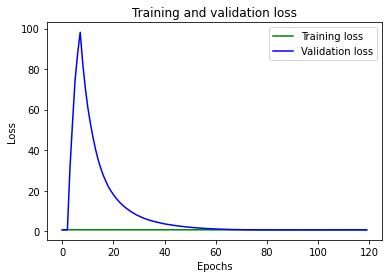

In [79]:
start = 0
loss_values = history.history['loss'][start:]
val_loss_values = history.history['val_loss'][start:]
epochs = range(start, len(loss_values) + start)
plt.plot(epochs, loss_values, 'g', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

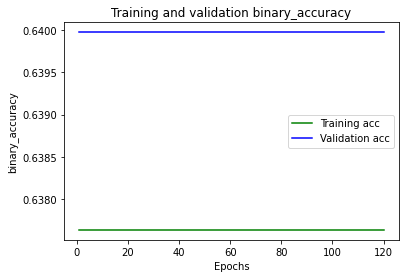

In [80]:
plt.clf()
acc_values = history.history['binary_accuracy']
val_acc_values = history.history['val_binary_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'g', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation binary_accuracy')
plt.xlabel('Epochs')
plt.ylabel('binary_accuracy')
plt.legend()
plt.show()

In [36]:
test = pd.read_csv(f'{folder}/cls_direct30_19.csv')
test

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,760,761,762,763,764,765,766,767,timestamp,direct
0,0,-1.220307,-0.614637,-0.670206,0.178659,-0.313210,0.572237,0.221028,0.020614,-0.612712,...,0.574090,-0.164001,0.384716,-0.909016,0.151841,-0.659906,-0.033642,0.319797,1599091200,1
1,1,-0.698458,-0.199042,-0.370935,0.128899,0.270091,0.030246,0.632135,0.220280,-0.050025,...,0.165580,-0.184490,0.246442,-0.184209,0.380183,-0.399366,0.085896,0.361025,1575072000,0
2,2,-0.486765,0.143920,-0.456979,-0.335641,-0.353965,0.064427,0.452425,0.813212,-0.307713,...,0.424229,0.131461,0.704737,-0.229201,-0.000967,-0.695509,0.237292,0.096614,1590192000,1
3,3,-0.233449,0.497034,-0.244626,-0.010935,-0.139950,-0.222993,0.129606,0.387854,0.429523,...,-0.262688,-0.056827,-0.060793,0.292290,0.133689,-0.552292,0.402135,0.419203,1599955200,0
4,4,-0.806347,0.100087,-0.147366,0.201620,-0.002529,-0.360041,0.035063,0.109274,-0.185003,...,0.308278,-0.098917,0.020196,-0.247934,-0.194947,-0.208917,0.630816,-0.045039,1550966400,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,994,-0.248387,0.211109,-0.005984,-0.356238,-0.359684,-0.137757,0.472790,0.507569,-0.664471,...,0.111481,-0.577677,0.229019,0.093510,0.016734,-0.525837,0.493276,0.253049,1590796800,1
9986,995,-0.768569,0.158932,0.068236,0.299254,-0.486654,-0.087249,0.474589,1.085041,-0.451256,...,0.169563,-0.128351,0.471525,-0.023869,-0.274979,-0.709775,0.415889,-0.340360,1596067200,1
9987,996,-0.073993,-0.264430,0.154831,0.191368,-0.706662,-0.264844,0.492613,0.639175,-0.136858,...,0.057556,-0.173148,0.524388,0.250073,-0.617254,-0.383013,0.137265,0.589417,1571616000,0
9988,997,-0.088228,0.037681,-0.163451,0.017490,-0.460612,-0.493232,0.226338,0.490925,0.108212,...,0.117323,0.126527,-0.189481,-0.155586,-0.077713,-0.237214,0.212463,0.376480,1574294400,0


In [62]:
x_test = np.array(test.iloc[:,2:770])
x_test

array([[-6.1463730e-01, -6.7020565e-01,  1.7865859e-01, ...,
        -3.3641793e-02,  3.1979680e-01,  1.5990912e+09],
       [-1.9904244e-01, -3.7093472e-01,  1.2889920e-01, ...,
         8.5896015e-02,  3.6102468e-01,  1.5750720e+09],
       [ 1.4391986e-01, -4.5697948e-01, -3.3564094e-01, ...,
         2.3729247e-01,  9.6614200e-02,  1.5901920e+09],
       ...,
       [-2.6443022e-01,  1.5483065e-01,  1.9136800e-01, ...,
         1.3726503e-01,  5.8941680e-01,  1.5716160e+09],
       [ 3.7680700e-02, -1.6345091e-01,  1.7490165e-02, ...,
         2.1246300e-01,  3.7647970e-01,  1.5742944e+09],
       [ 9.9851586e-02,  4.2408280e-02,  2.0780262e-01, ...,
         2.2081050e-02,  5.5015457e-01,  1.5933888e+09]])

In [63]:
y_test = np.array(test['direct'])
y_test

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [64]:
results = model.evaluate(x_test, y_test)
print(results)

313/313 [==============================] - 2s 6ms/step - loss: 0.6737 - binary_accuracy: 0.6517
[0.6736859679222107, 0.6516516804695129]


In [65]:
predictions = model.predict(x_test)
predictions

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [66]:
threshold = 0.5
predictions_df = pd.DataFrame()
predictions_df['direct'] = [1 if val > threshold else 0 for val in predictions]
predictions_df['direct'].value_counts()

1    9990
Name: direct, dtype: int64

In [51]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [52]:
#print(roc_auc_score(predictions_df['direct'], y_test))
print(confusion_matrix(predictions_df['direct'], y_test))
print(accuracy_score(predictions_df['direct'], y_test))

[[ 653 2201]
 [2827 4309]]
0.4966966966966967


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [55]:
%%time
parameters = {'C': np.linspace(0.0001, 100, 20)}
grid_search = GridSearchCV(LogisticRegression(solver="saga"), parameters)
grid_search.fit(x_train, y_train)

print('best parameters: ', grid_search.best_params_)
print('best scrores: ', grid_search.best_score_)

best parameters:  {'C': 0.0001}
best scrores:  0.5456493530567604
Wall time: 3h 21min 40s
Parser   : 174 ms


In [59]:
%%time
clf = LogisticRegression(solver="saga", C=0.0001)
clf.fit(x_train, y_train)

Wall time: 14min 28s


LogisticRegression(C=0.0001, solver='saga')

In [60]:
clf.score(x_test, y_test)

0.5528028028028028

In [55]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
clf_dummy = DummyClassifier()

scores = cross_val_score(clf_dummy, x_test, y_test)
print("Dummy classifier score: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Dummy classifier score: 0.652 (+/- 0.00)


In [67]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
%%time
rf = RandomForestRegressor(n_estimators = 1000)
rf.fit(x_train, y_train)

In [ ]:
rf_pred = rf.predict(x_test)